# 1 Linear regression with one variable (Univariate Linear regression)

In [182]:
import os

import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D 

# tells matplotlib to embed plots within the notebook
%matplotlib inline


In [313]:
# Read comma separated data
data = np.loadtxt(os.path.join(r'C:\Users\Ghada\Downloads', 'univariateData.dat'), delimiter=',')
X, y = data[:, 0], data[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=27)
m = y_train.size  # number of training examples
print(m)


87


In [314]:
x = np.stack([np.ones(m), X_train], axis=1)
print(x)

[[ 1.     18.959 ]
 [ 1.      5.1793]
 [ 1.      5.7737]
 [ 1.      7.5402]
 [ 1.      5.8014]
 [ 1.      7.2259]
 [ 1.      6.002 ]
 [ 1.      6.5159]
 [ 1.      6.4296]
 [ 1.      5.7077]
 [ 1.      7.0931]
 [ 1.      6.8825]
 [ 1.      5.5204]
 [ 1.      9.7687]
 [ 1.      6.1891]
 [ 1.      5.4069]
 [ 1.      7.8247]
 [ 1.      5.734 ]
 [ 1.     20.27  ]
 [ 1.      7.4764]
 [ 1.      9.1802]
 [ 1.      5.4994]
 [ 1.     12.828 ]
 [ 1.      5.6407]
 [ 1.      5.0269]
 [ 1.      7.6366]
 [ 1.      7.2182]
 [ 1.      5.5277]
 [ 1.     14.164 ]
 [ 1.      5.0365]
 [ 1.      8.2111]
 [ 1.     10.274 ]
 [ 1.      5.0594]
 [ 1.      6.1101]
 [ 1.      5.6397]
 [ 1.      5.1884]
 [ 1.      6.3654]
 [ 1.      5.0546]
 [ 1.     22.203 ]
 [ 1.      8.0959]
 [ 1.      6.4862]
 [ 1.     13.176 ]
 [ 1.      8.5781]
 [ 1.      8.8254]
 [ 1.      9.3102]
 [ 1.      5.8707]
 [ 1.      5.1301]
 [ 1.      7.4239]
 [ 1.     10.136 ]
 [ 1.      6.3261]
 [ 1.      7.5386]
 [ 1.     20.341 ]
 [ 1.      5

## 1.1 Fit the training data

In [315]:
def __init__(self, alpha=0.05, n_iterations=1000):
        self.alpha = alpha
        self.n_iterations = n_iterations
        def fit(self, x, y_train):
            self.cost_ = []
            self.w_ = np.zeros((x.shape[1], 1))
            m = x.shape[0]
            
            for _ in range(self.n_iterations):
                y_pred = np.dot(x, self.w_)
                residuals = y_pred - y_train
                gradient_vector = np.dot(x.T, residuals)
                self.w_ -= (self.eta / m) * gradient_vector
                cost = np.sum((residuals ** 2)) / (2 * m)
                self.cost_.append(cost)
                return self
        def predict(self, x):
            return np.dot(x, self.w_)
    

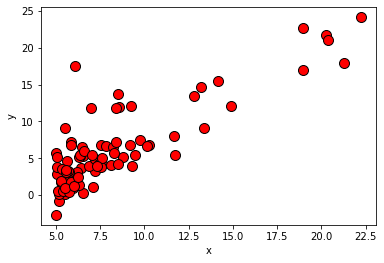

In [316]:
def plotData(X_train, y_train):
   
    fig = pyplot.figure()  # open a new figure
    
   
    pyplot.plot(X_train, y_train, 'ro', ms=10, mec='k') # ms for the radius of the point
    pyplot.ylabel('y')
    pyplot.xlabel('x')

plotData(X_train, y_train)

## 1.2 Method to use the trained linear regression model for predictiction

In [317]:

def mean(vals):
    return sum(vals)/float(len(vals))

def variance(vals):
    val_mean = mean(vals)
    return sum([(x-val_mean)**2 for x in vals])

def covariance(x,x_mean,y_train,y_mean):
    cov = 0.0
    for i in range(len(x)):
        cov += (x[i]-x_mean) * (y_train[i]-y_mean)
    return cov

def getBetas(x,y_train):
    x_mean = mean(x)
    y_mean = mean(y_train)
    cov = covariance(x,x_mean,y_train,y_mean)
    x_var = variance(x)
    b1 = cov/x_var
    b0 = np.mean(y_train) - b1 * np.mean(x)
    return b0,b1

def predict(x,y_train):
    intercept,coeff = getBetas(x,y_train)
    preds = intercept+(coeff*x)
    return preds

# Model coefficients
intercept, coeff = getBetas(x,y_train)
print(f'Intercept: {intercept}\n\nCoefficient: {coeff}')

# Model Prediction
fcov_preds = predict(x,y_train)

Intercept: [       nan 0.66376174]

Coefficient: [       nan 1.18708678]


C:\Users\Ghada\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


## 1.3 Cost function

In [318]:
def computeCost(x, y_train, theta):
    # initialize some useful values
    m = y_train.size  # number of training examples
    
    
    J = 0
    
    
    J =(1/(2*m))* sum((np.dot(x,theta)-y_train)**2)
    

    return J

In [319]:
np.array([[1,2],[2,4]])
a = np.zeros(2)

In [320]:
J = computeCost(x, y_train, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed for the Univariate model = %.2f' % J)

With theta = [0, 0] 
Cost computed for the Univariate model = 34.27


## 1.4 Gradient Descent

In [321]:
def gradientDescent(x, y_train, theta, alpha, num_iters):
    
    m = y_train.shape[0]  
    
    theta = theta.copy()
    
    
    
    J_history = [] 
    
    for i in range(num_iters):
        
        theta = theta - alpha* (1/m) * (np.dot((np.dot(x,theta)-y_train),x))
        
        
        J_history.append(computeCost(x, y_train, theta))
    
    return theta, J_history

In [323]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(x ,y_train, theta, alpha, iterations)
print('Theta, of Univariate model, found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print([*theta])


Theta, of Univariate model, found by gradient descent: -3.3872, 1.1655
[-3.3872068615471638, 1.165526375238939]


### plot the linear fit

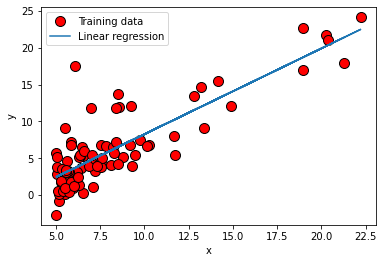

In [324]:

plotData(x[:, 1], y_train)
pyplot.plot(x[:, 1], np.dot(x, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

In [325]:
# Predict values for x of 12.828
predict1 = np.dot([1, 12.828], theta)
print('For x = 12.828, we predict a y of {:.2f}\n'.format(predict1))



For x = 12.828, we predict a y of 11.56



## 1.5 Evaluate performance of the prediction of Univariate Linear Regrission model for the test data

In [326]:
fcov_preds = predict(X_test,y_test)

print('fcov_preds =',fcov_preds)

fcov_preds = [1.54085014 3.4629522  9.43575917 7.1465852  0.02041954 0.19670664
 3.90153795 0.48629507 1.54474868 6.2681954 ]


In [327]:
def r2(fcov_preds,y_test):
    sst = np.sum((y_test - y_test.mean())**2)
    ssr = np.sum((fcov_preds - y_test)**2)
    r2 = 1-(ssr/sst)
    return(r2)
#----------------

print('Performance for the Univariate model = %.2f' % r2(fcov_preds,y_test))
r2(fcov_preds,y_test)

Performance for the Univariate model = 0.67


0.6665755898650905

# 2 Linear regression with multiple variables (Multivariate Linear regression)

In [328]:
# Load data
data = np.loadtxt(os.path.join(r'C:\Users\Ghada\Downloads', 'multivariateData.dat'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


## 2.1 Feature Normalization

In [329]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1]) #mean value for each feature
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X_norm - mu) / sigma
    
    return X_norm, mu, sigma

In [330]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [331]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

## Fit

In [332]:
def __init__(self, alpha=0.05, n_iterations=1000):
        self.alpha = alpha
        self.n_iterations = n_iterations
        def fit(self, x, y):
            self.cost_ = []
            self.w_ = np.zeros((x.shape[1], 1))
            m = x.shape[0]
            
            for _ in range(self.n_iterations):
                y_pred = np.dot(x, self.w_)
                residuals = y_pred - y
                gradient_vector = np.dot(x.T, residuals)
                self.w_ -= (self.eta / m) * gradient_vector
                cost = np.sum((residuals ** 2)) / (2 * m)
                self.cost_.append(cost)
                return self
        def predict(self, x):
            return np.dot(x, self.w_)

## 2.2 Define the cost func.

### Splitting training and testing sets

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=27)
m = y_train.size 
print('m_train = ', m)

def computeCostMulti(X_train, y_train, theta):
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    J = 0
    
    J =(1/(2*m))* sum((np.dot(X_train,theta)-y_train)**2)
    
    return J

print('With theta = [-1, 2] \nCost computed for the Multivariate model = %.3f' % J)

m_train =  42
With theta = [-1, 2] 
Cost computed for the Multivariate model = 34.267


## 2.3 Gradient Descent

In [334]:
def gradientDescentMulti(X_train, y_train, theta, alpha, num_iters):
   
    # Initialize some useful values
    m = y_train.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        
        theta = theta - alpha* (1/m) * (np.dot((np.dot(X_train,theta)-y_train),X_train))
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X_train, y_train, theta))
    
    return theta, J_history

Theta, of Multivariate model, found by gradient descent: 338025.7379, 102319.1902
[338025.737885484, 102319.19022950446, -334.4723690828155]


Text(0, 0.5, 'Cost J')

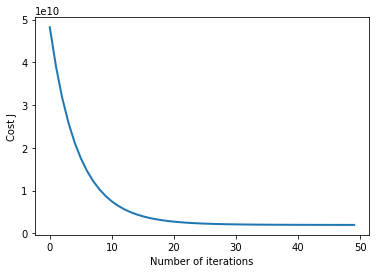

In [335]:
# Choose some alpha value - change this
alpha = 0.1
num_iters = 50

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X_train, y_train, theta, alpha, num_iters)
print('Theta, of Multivariate model, found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print([*theta])

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

## 2.5 Evaluate performance of the prediction of Multivariate Linear Regrission model for the test data

In [336]:
# get y_pred
y_ = X_test.dot(theta)

print(y_)

[238583.08862571 277365.86288961 406468.25238551 338012.75150361
 272160.12137767]


In [337]:
def r2(y_,y_test):
    sst = np.sum((y_test - y_test.mean())**2)
    ssr = np.sum((y_ - y_test)**2)
    r2 = 1-(ssr/sst)
    return(r2)

print('Performance of the prediction for the test data of the Multivariate model = %.2f' % r2(y_,y_test))

r2(y_,y_test)


Performance of the prediction for the test data of the Multivariate model = 0.82


0.8201840469670674